In [26]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning);

import sys
sys.executable

'/home/mingrui/anaconda3/envs/py36_cu90/bin/python'

In [27]:
import os

# plotting
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 3361104647
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams['figure.figsize'] = [15, 15]


import py_wsi
import deephistopath.wsi.slide as deep_slide
import deephistopath.wsi.util as util
import deephistopath.wsi.filter as filter
import deephistopath.wsi.tiles as tiles
util.ADDITIONAL_NP_STATS = True

In [28]:
FILE_DIR = '/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample'
DB_DIR = ''
DB_NAME = 'patch_db'

In [29]:
turtle = py_wsi.Turtle(FILE_DIR, DB_DIR, DB_NAME)

print("Total WSI images:    " + str(turtle.num_files))
print("LMDB name:           " + str(turtle.db_name))
print("File names:          " + str(turtle.files))

12 WSI found in directory.
Total WSI images:    12
LMDB name:           patch_db
File names:          ['132287.svs' '132223.svs' '132217.svs' '132225.svs' '132240.svs'
 '132298.svs' '132242.svs' '132234.svs' '132257.svs' '132214.svs'
 '132247.svs' '132224.svs']


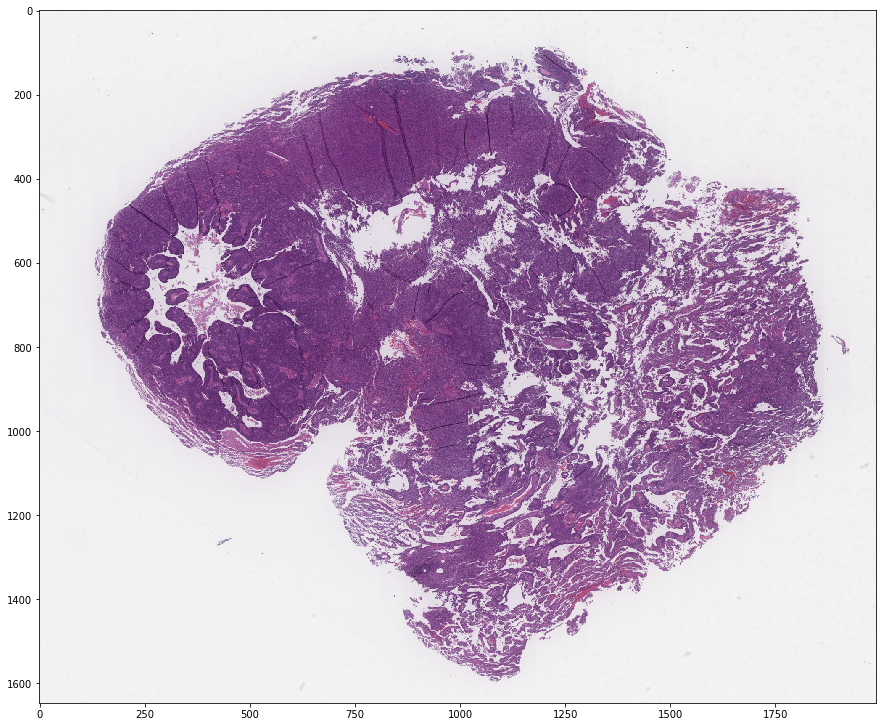

In [5]:
pil_img , large_h, large_w, new_h, new_w = deep_slide.show_scaled_slide_image('/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/train/132214.svs')
imshow(pil_img)

RGB                  | Time: 0:00:00.003837 Min:  17.00  Max: 245.00  Mean: 188.15  Binary: F  Type: uint8   Shape: (1647, 1991, 3)
Gray                 | Time: 0:00:00.106461 Min:  23.00  Max: 244.00  Mean: 178.87  Binary: F  Type: uint8   Shape: (1647, 1991)


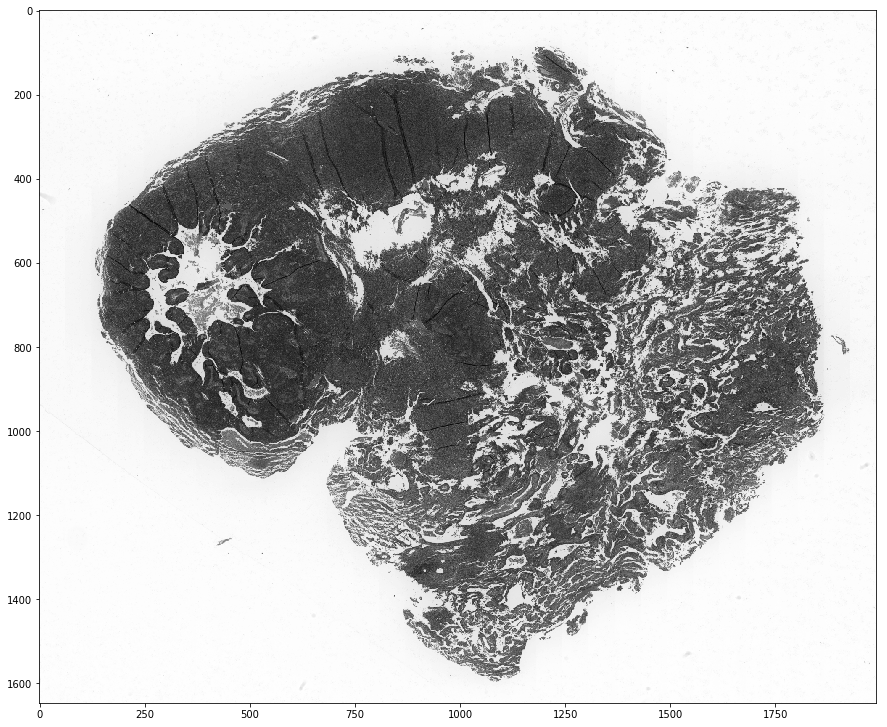

In [6]:
rgb = util.pil_to_np_rgb(pil_img)
grayscale = filter.filter_rgb_to_grayscale(rgb)
imshow(grayscale, cmap='gray')

Complement           | Time: 0:00:00.000689 Min:  11.00  Max: 232.00  Mean:  76.13  Binary: F  Type: uint8   Shape: (1647, 1991)


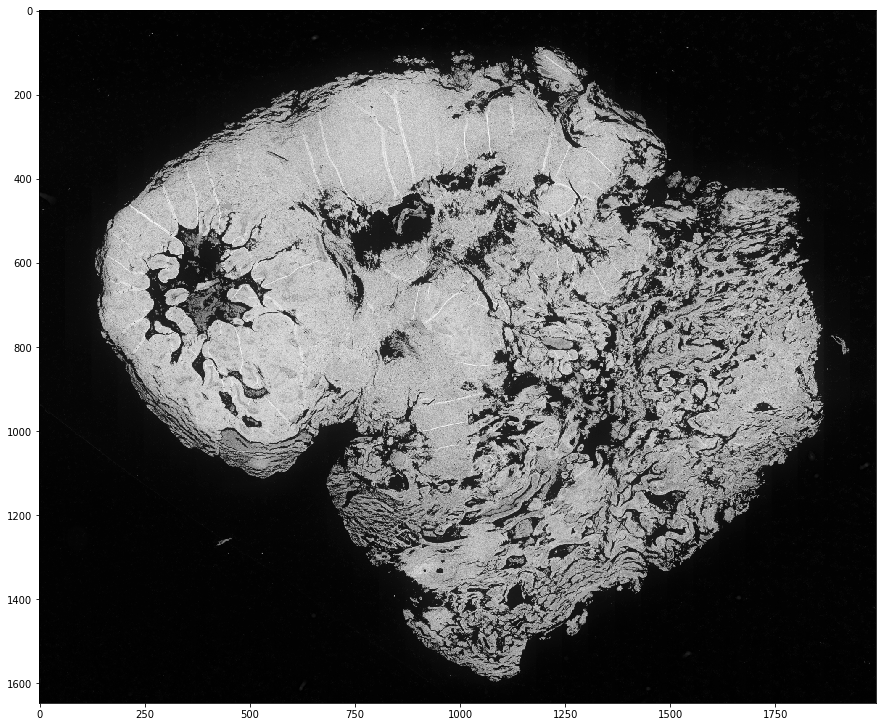

In [7]:
complement = filter.filter_complement(grayscale)
imshow(complement, cmap='gray')

Threshold            | Time: 0:00:00.001754 Min:   0.00  Max:   1.00  Mean:   0.38  Binary: T  Type: bool    Shape: (1647, 1991)


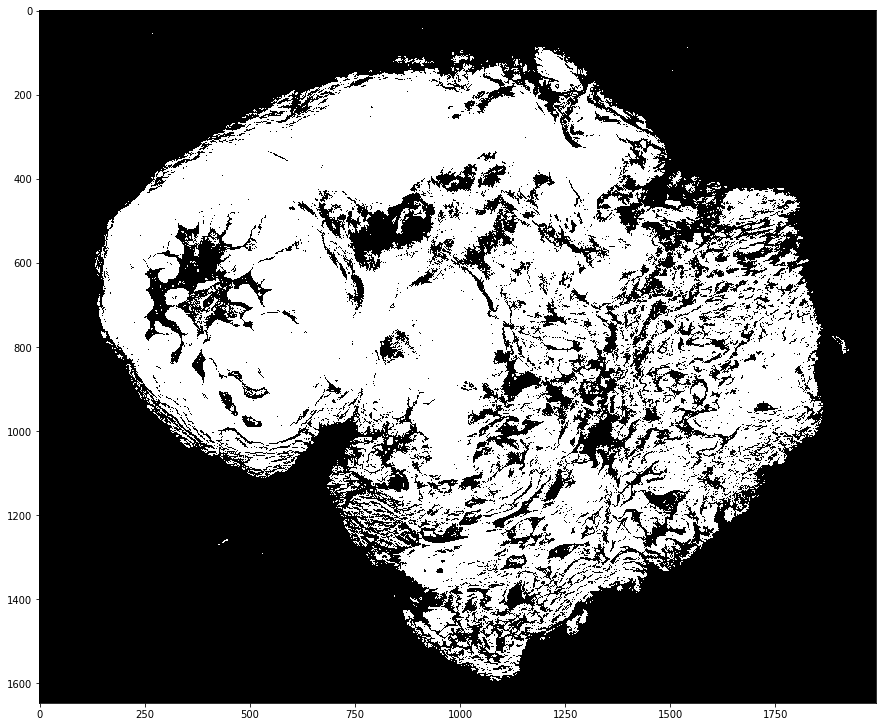

In [8]:
thresh = filter.filter_threshold(complement, threshold=100)
imshow(thresh, cmap='gray')

Hysteresis Threshold | Time: 0:00:00.103116 Min:   0.00  Max: 255.00  Mean: 108.59  Binary: T  Type: uint8   Shape: (1647, 1991)


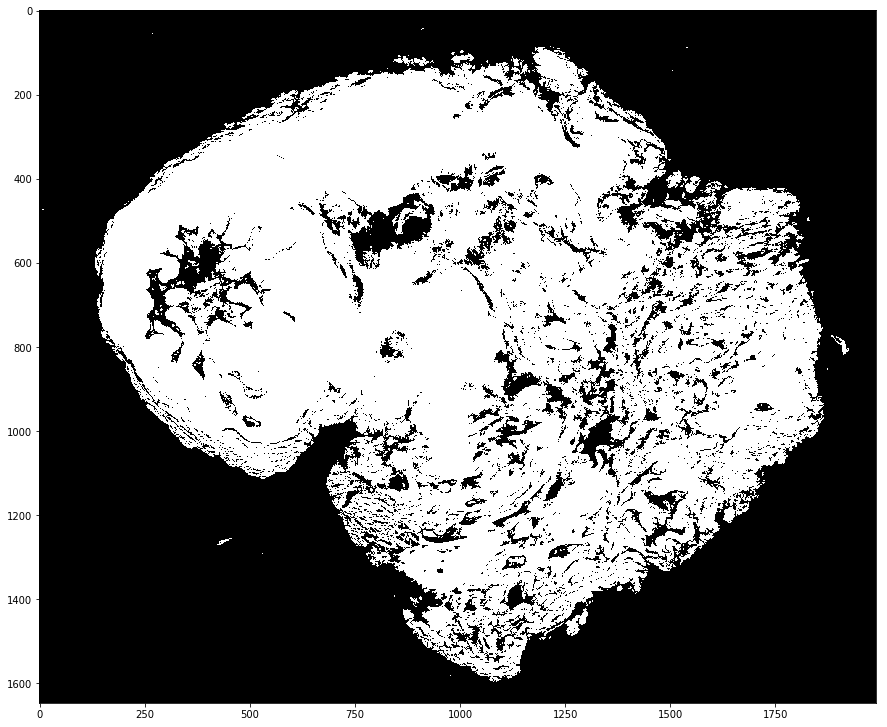

In [9]:
hyst = filter.filter_hysteresis_threshold(complement)
imshow(hyst, cmap='gray')

Otsu Threshold       | Time: 0:00:00.017599 Min:   0.00  Max: 255.00  Mean:  98.33  Binary: T  Type: uint8   Shape: (1647, 1991)


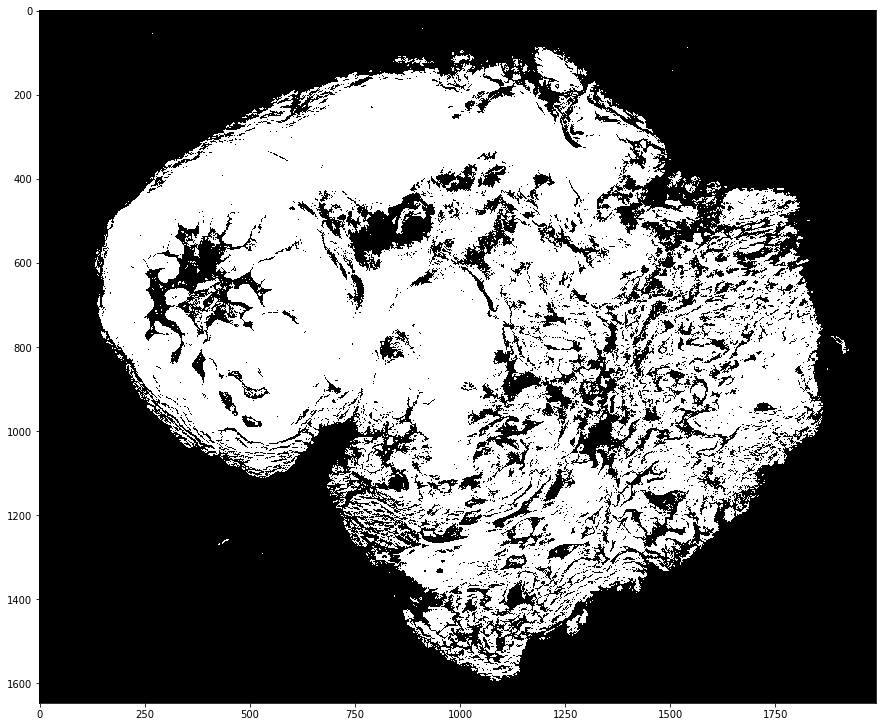

In [10]:
otsu = filter.filter_otsu_threshold(complement)
imshow(otsu, cmap='gray')

Contrast Stretch     | Time: 0:00:00.059488 Min:   0.00  Max: 255.00  Mean:  98.27  Binary: F  Type: uint8   Shape: (1647, 1991)


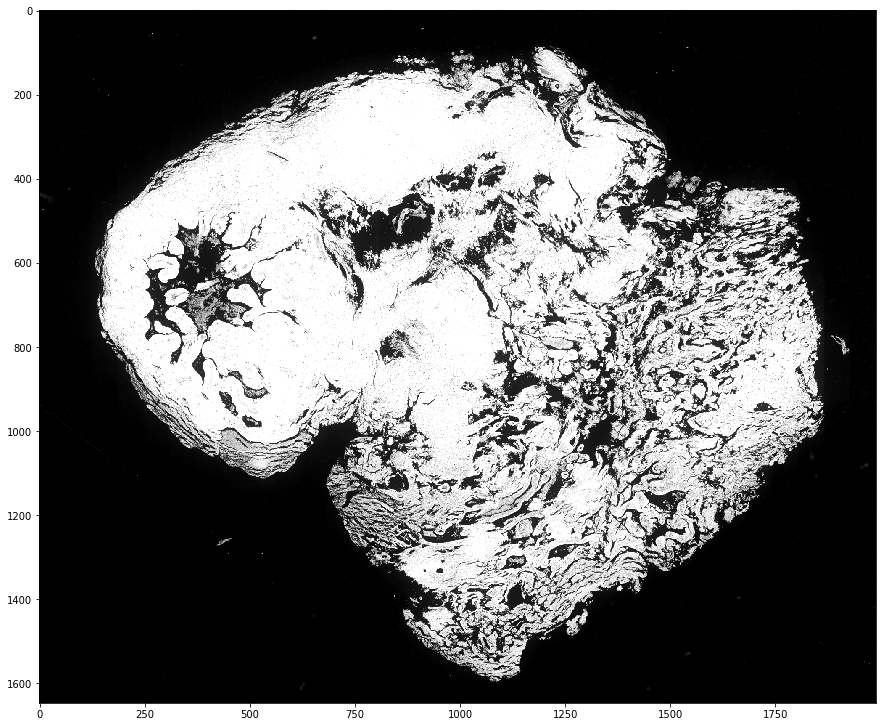

In [11]:
contrast_stretch = filter.filter_contrast_stretch(complement, low=100, high=200)
imshow(contrast_stretch, cmap='gray')

Hist Equalization    | Time: 0:00:00.110589 Min:   0.00  Max: 255.00  Mean: 131.97  Binary: F  Type: uint8   Shape: (1647, 1991)


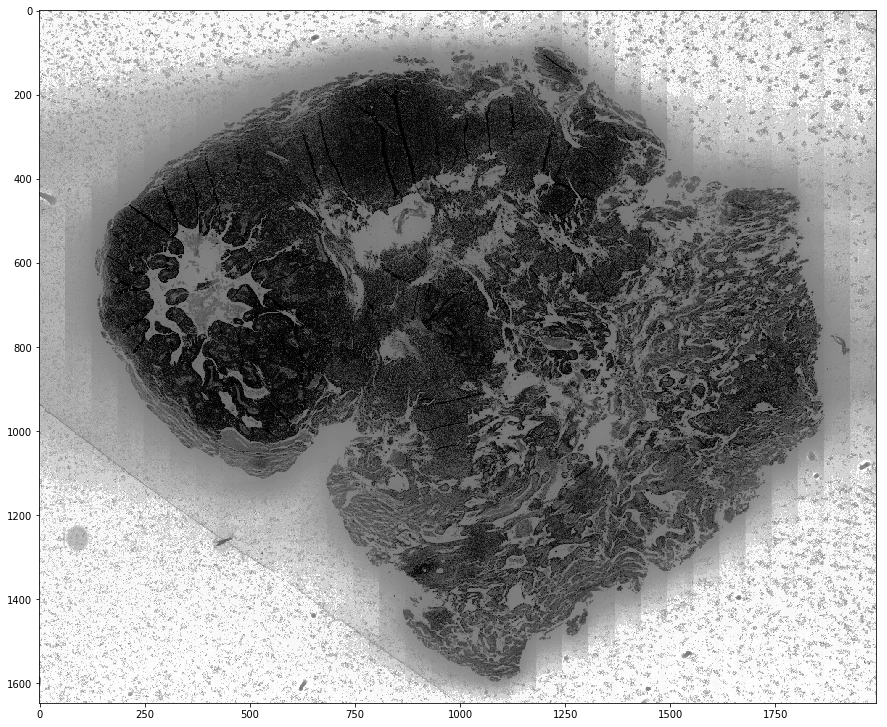

In [12]:
hist_equ = filter.filter_histogram_equalization(grayscale)
imshow(hist_equ, cmap='gray')

Adapt Equalization   | Time: 0:00:00.219727 Min:   0.00  Max: 255.00  Mean: 178.82  Binary: F  Type: uint8   Shape: (1647, 1991)


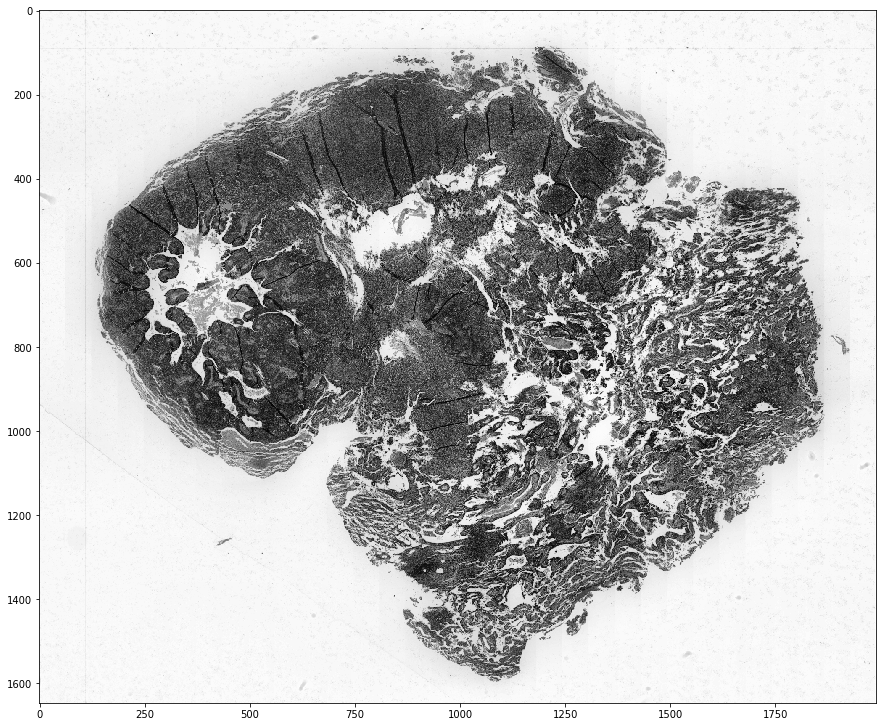

In [23]:
adaptive_equ = filter.filter_adaptive_equalization(grayscale)
imshow(adaptive_equ, cmap='gray')

In [14]:
pil_combo = tiles.display_image_with_rgb_and_hsv_histograms(rgb)

RGB to HSV           | Time: 0:00:00.718830 Min:   0.00  Max:   0.97  Mean:   0.52  Binary: F  Type: float64 Shape: (1647, 1991, 3)
NumPy Array          | Time: ---            Min:   0.00  Max: 255.00  Mean: 251.79  Binary: F  Type: uint8   Shape: (1080, 1080, 3)
NumPy Array          | Time: ---            Min:   0.00  Max: 255.00  Mean: 251.42  Binary: F  Type: uint8   Shape: (1080, 1080, 3)
NumPy Array          | Time: ---            Min:   0.00  Max: 255.00  Mean: 251.92  Binary: F  Type: uint8   Shape: (1080, 1080, 3)
HSV to H             | Time: 0:00:00.026865 Min:   0.00  Max:   0.97  Mean:   0.52  Binary: F  Type: float64 Shape: (1647, 1991, 3)
NumPy Array          | Time: ---            Min:   0.00  Max: 255.00  Mean: 252.77  Binary: F  Type: uint8   Shape: (1080, 1080, 3)
NumPy Array          | Time: ---            Min:   0.00  Max: 255.00  Mean: 252.07  Binary: F  Type: uint8   Shape: (1080, 1080, 3)
NumPy Array          | Time: ---            Min:   0.00  Max: 255.00  Mean: 

In [15]:
type(pil_combo)

PIL.Image.Image

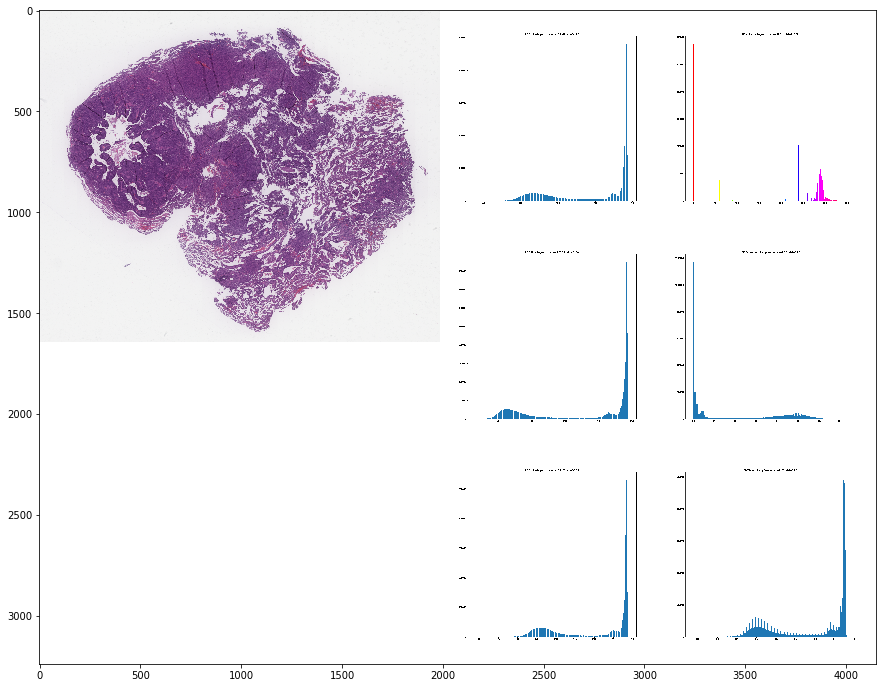

In [16]:
imshow(pil_combo)

In [17]:
entropy = filter.filter_entropy(grayscale, output_type="bool")

Entropy              | Time: 0:00:05.761806 Min:   0.00  Max:   1.00  Mean:   0.31  Binary: T  Type: bool    Shape: (1647, 1991)


In [18]:
mask_rgb = util.mask_rgb(rgb, entropy)

Mask RGB             | Time: 0:00:00.006465 Min:   0.00  Max: 239.00  Mean:  42.04  Binary: F  Type: uint8   Shape: (1647, 1991, 3)


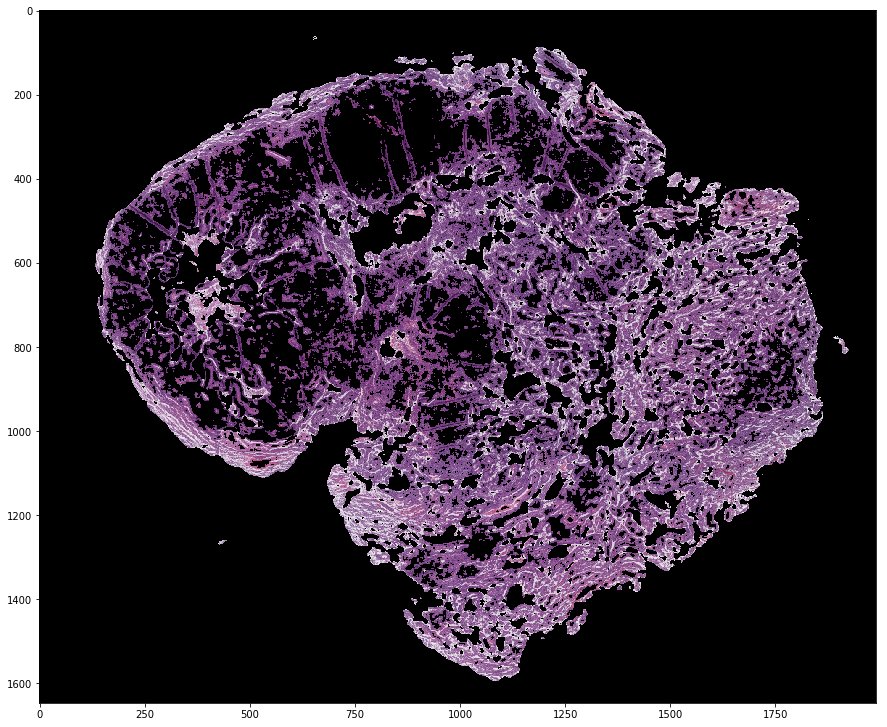

In [19]:
imshow(mask_rgb)